In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML, Image, Video
import time
import random

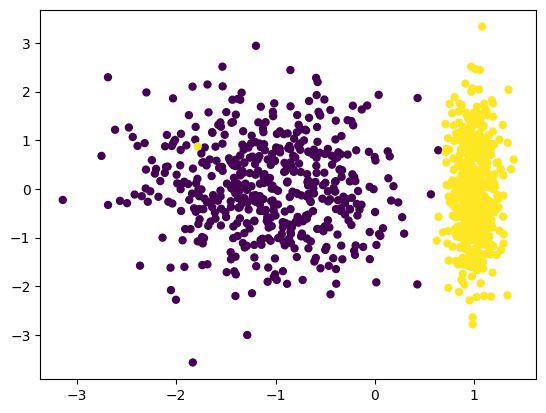

In [26]:
N = 1000 #データの数
d = 2 # 次元数
K = 2 # クラス数

X, y = make_classification(
    n_samples=N,
    n_features=d,
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=K
)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25) #c = yで色指定できる
plt.show()

In [27]:
model = LogisticRegression(
    penalty=None,
    dual=False,
    tol=0.0001, #誤差の許容値，勾配降下のときに使うのかな？
    C = 1.0, # 正則化の強さ
    fit_intercept= False,# バイアス項を入れるかどうか，どのように影響するかはよくわからない
    intercept_scaling= 1.0, # solver='liblinear'でfit_intercept=Trueのときに発動
    class_weight=None, # クラスの数に応じて重みを受けることができる．
    random_state=None, # solver=['sag','saga','liblinear']のときにデータをシャッフルする．
    solver='newton-cg', # newton-cg を実装したい
    max_iter=100,
    multi_class='auto',
    verbose=0, # 冗長と訳せる，確かいらない
    warm_start=False, # 前のソリューションの値をそのまま持ってくる，でない場合はただ初期化するだけ
    n_jobs=None, # 使用するcpuのコア数
    l1_ratio=None # elasticnetのときの正則化割合，l1の割合を操作できる．
    )

In [28]:
start = time.time()
model.fit(X,y)
end = time.time()
time_diff = end - start
print('実行時間',time_diff)
print('クラス数',model.classes_)
print('特徴量の数',model.n_features_in_)
print('coef',model.coef_)
print('intercept',model.intercept_)
print('反復数',model.n_iter_)

実行時間 0.0033419132232666016
クラス数 [0 1]
特徴量の数 2
coef [[5.90671268 0.1503166 ]]
intercept [0.]
反復数 [7]


---

In [29]:
class SLogisticRegression():
    def __init__(self, tol: float=0.0001, max_iter: int=100):
        self.tol = tol
        self.max_iter = max_iter

    @staticmethod
    def _sigmoid(Xw):
        return 1 / (1 + np.exp(-Xw))

    def fit(self, x, y):
        self.w = np.random.randn(x.shape[1])
        self.r = np.empty(x.shape[0])
        tol_vec = np.full(x.shape[1],self.tol)
        diff = np.full(x.shape[1], np.inf)
        self.iter=0
        while np.any(diff > tol_vec) and (self.iter < self.max_iter):
            y_hat = self._sigmoid(x @ self.w)
            for _ in range(X.shape[0]):
                self.r[_] = y_hat[_] * (1 - y_hat[_])
            xr = x.T * self.r
            w_new = np.dot((np.linalg.solve(np.dot(xr,x), xr)),
                           (np.dot(x, self.w) - (1 / self.r * (y_hat - y))))

            self.iter += 1
            diff = w_new - self.w
            self.w = w_new

    def predict(self, x):
        y_hat_Xw = np.dot(x, self.w)
        self.predict_proba = self._sigmoid(y_hat_Xw)
        y_pred = self.predict_proba.copy()
        for _ in range(x.shape[0]):
            if y_pred[_] > .5:
                y_pred[_] = 1
            elif y_pred[_] < .5:
                y_pred[_] = 0
        return y_pred

In [30]:
start = time.time()
model.fit(X,y)
end = time.time()
time_diff = end - start
print('実行時間',time_diff)
print('クラス数',model.classes_)
print('特徴量の数',model.n_features_in_)
print('coef',model.coef_)
# print('intercept',model.intercept_)
print('反復数',model.n_iter_)

実行時間 0.0048787593841552734
クラス数 [0 1]
特徴量の数 2
coef [[5.90671268 0.1503166 ]]
反復数 [7]


In [32]:
Smodel = SLogisticRegression(
    tol=0.0001,
    max_iter=100
)

start = time.time()
Smodel.fit(X,y)
end = time.time()
time_diff = end - start
print('実行時間',time_diff)

print("coef_",Smodel.w)
pred = Smodel.predict(X)
# print("accuracy",accuracy_score(y, pred))
print("更新回数", Smodel.iter)

実行時間 0.02976822853088379
coef_ [5.90744993 0.15035707]
更新回数 9
